# Loc Anh Quan Nguyen

This notebook is a template showing you how to use some tools that will be useful for problem set 5.

The tools are:
1. Qmod: an implementation of the q-Model as a class in python. This is used to obtain phase diagrams.
2. Dolo: a general purpose tool used to represent and solve economic models. This is used to compute optimal responses.

The use of both tools will make us have to handle two representations of our problems, one as a Qmod object, and one as a Dolo model.

Start by loading the tools we will be using.

In [1]:
! pip install dolo==0.4.9.12

  Using cached dolo-0.4.9.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached dolang-0.0.10-py3-none-any.whl.metadata (671 bytes)
  Using cached ipython-7.34.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [78 lines of output]
      /private/var/folders/z8/hw82hydj2pv13ldg41l66pwc0000gn/T/pip-build-env-u9teygz3/overlay/lib/python3.13/site-pack

In [2]:
# Preamble: import the packages we will be using

# Usual packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from dolo import *
import dolo.algos.perfect_foresight as pf
import pandas as pd

# Import the Qmod python code from external file

# Since the Qmod class is in other folder we need to
# change the path.
import sys
sys.path.append('../')
from Qmod import Qmod

    pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


In [3]:
# Preamble: import the packages we will be using

# Usual packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd

# Install dolo package if not already installed
# Uncomment the following line if you need to install dolo
# !pip install dolo

# Now import dolo
import dolo
import dolo.algos.perfect_foresight as pf

# Import the Qmod python code from external file

# Since the Qmod class is in other folder we need to
# change the path.
import sys
sys.path.append('../')
from Qmod import Qmod

In [4]:
# Preamble: import the packages we will be using

# Usual packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd

# Try to fix the numba/dolo compatibility issue
# Option 1: Install the correct version of numba that works with dolo
# !pip install numba==0.54.1  # You may need to adjust the version number

# Option 2: Use a try-except block to handle the import error
try:
    from dolo import *
    import dolo.algos.perfect_foresight as pf
except ImportError as e:
    print(f"Error importing dolo: {e}")
    print("You may need to install a compatible version of numba and dolo:")
    print("!pip install numba==0.54.1 dolo")  # Adjust versions as needed

# Import the Qmod python code from external file

# Since the Qmod class is in other folder we need to
# change the path.
import sys
sys.path.append('../')
try:
    from Qmod import Qmod
except ImportError as e:
    print(f"Error importing Qmod: {e}")

I then define a function that takes two Qmod objects and plots their phase diagrams in the same figure.

In [5]:
def phase_diagrams(mod1,mod2,k_min,k_max,npoints = 300):
    """
    Draws the phase diagram of the Qmodel under two different sets of
    parameter values in the same figure, and returns it.

    Parameters:
        - mod1          : Qmod object representing the first set of parameter values.
        - mod1          : Qmod object representing the second set of parameter values.
        - [k_min,k_max] : limits for the value of capital in the phase diagrams.
        - npoints       : number of points in the capital grid to be used for phase
                          diagram plots.
    """

    # Create a figure
    fig, ax = plt.subplots()

    # Plot the loci of the pre and post-change models.
    k_range = np.linspace(k_min,k_max,npoints)
    mods = [mod1,mod2]
    colors = ['r','b']
    labels = ['Mod. 1','Mod. 2']
    for i in range(2):

        # Plot k0 locus
        ax.plot(k_range,mods[i].P*np.ones(npoints),
                 linestyle = '--', color = colors[i],label = labels[i] + ' loci')
        # Plot lambda0 locus
        ax.plot(k_range,[mods[i].lambda0locus(x) for x in k_range],
                 linestyle = '--', color = colors[i])
        # Plot steady state
        ax.plot(mods[i].kss,mods[i].P,marker = '*', color = colors[i])
        
        # Plot stable arm
        stab_arm = [mods[i].findLambda(k0 = x, k1 = mods[i].k1Func(x)) for x in k_range]
        ax.plot(k_range, stab_arm, linestyle = '-', color = colors[i], label = labels[i] + ' stable arm.')

    return(ax)

Now I create a base model parametrization.

In [6]:
# Base parameters

# Discount factor and return factor
beta = 0.98
R = 1/beta

# Tax rate
tau = 0.05

# Share of capital in production
alpha = 0.33

# Adjustment costs
omega = 1

# Investment tax credit
zeta = 0

# Depreciation rate
delta = 0.1

# Technological factor
psi = 1

And create the objects representing the model. First in Qmod:

In [7]:
## Qmod python class

# Create the object.
Qmodel = Qmod(beta, tau, alpha, omega, zeta, delta, psi)
# Solve to find the steady state and policy rule.
Qmodel.solve()

    Capital diverged at step 2. Holding capital constant.
    Capital diverged at step 3. Holding capital constant.
    Capital diverged at step 4. Holding capital constant.
    Capital diverged at step 9. Holding capital constant.
    Could not find k2 solution at step 6: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 13: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Capital diverged at step 11. Holding capital constant.
    Capital diverged at step 15. Holding capital constant.
    Capital diverged at step 24. Holding capital constant.
    Could not find k2 solution at step 16: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 19: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    

Then in Dolo.

There is an important difference. The implementation in Dolo treats the interest rate, technological factor, tax rate, and investment tax credit as not parameters but exogenous variables subject to change.

In [8]:
## Dolo

# First import the external file with the model description.
QDolo = yaml_import("../Dolo/Q-model.yaml")

# Then replace the default parameters with our desired ones.
QDolo.set_calibration(alpha = alpha, delta = delta, omega = omega)

#############
# IMPORTANT #
#############

# We do not pass R, psi, tau, or itc because they are handled not as parameters
# but exogenous variables that can change over time. (see below)

    Impossible to evaluate expression


## Dynamic response example: changes in productivity.

I now give an example of how to use Dolo to solve for the optimal behavior of the firm.
The basic idea is:
1. We will create a path for the exogenous variables of the model.
2. Dolo assumes that this path is announced to the firm at the first time period, and it computes the optimal dynamics according to these paths.

In [9]:
# Set up the basic features of the simulation

# Total simulation time
T = 100
# Initial level of capital
k0 = Qmodel.kss

,R,tau,itc_1,psi
0,1.020408,0.05,0,1.0
1,1.020408,0.05,0,1.0
2,1.020408,0.05,0,1.0
3,1.020408,0.05,0,1.2
4,1.020408,0.05,0,1.2


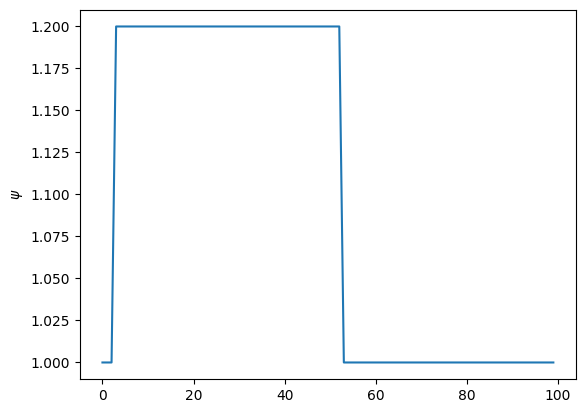

In [10]:
# Design the shock:

# for this example, I am assuming that productivity increases and then
# goes back to the original level.

psi_high = 1.2
Psi_sequence = np.array([psi]*3+
                        [psi_high]*50+
                        [psi]*(T-3-50))
# Check the pattern of the shock
plt.figure()
plt.plot(Psi_sequence)
plt.ylabel('$\psi$')

# Dolo receives a DataFrame with the full future paths for ALL exogenous
# variables. So we create one:
Exog = pd.DataFrame({'R':[R]*T,
                     'tau':[tau]*T,
                     'itc_1':[zeta]*T,
                     'psi':Psi_sequence})

# Examine the first few entries.
Exog.head()
# Note all other variables are left constant.

In [11]:
# Now use the "perfect foresight" dolo solver
response = pf.deterministic_solve(model = QDolo, # Model we are using (in dolo)
                                  shocks = Exog, # Paths for exog. variables 
                                  T=T,           # Total simulation time
                                  s1 = [k0],     # Initial state
                                  verbose=True)

# Response is a DataFrame with the paths of every variable over time.
# It adds information we don't need on the first row. So we delete it
response = response[1:]

# Inspect the first few elements.
response.head()

	> 1 | 0.08584546286337591 | 0
	> 2 | 0.028939741816380926 | 0
	> 3 | 0.005488334466131395 | 0
	> 4 | 0.0002628160877001795 | 0
	> 5 | 6.063950412915631e-07 | 0
> System was solved after iteration 5. Residual=6.063950412915631e-07


,k,i,y,y_k,beta,j,xi,iota,j_i,j_k,lambda_1,q_1,R,tau,itc_1,psi
1,4.298990,0.653092,1.618121,0.124211,0.98,0.005794,0.645708,0.051918,0.051918,-0.006539,1.051918,1.051918,1.020408,0.05,0.0,1.0
2,4.522183,0.702993,1.645375,0.120069,0.98,0.006953,0.695747,0.055454,0.055454,-0.007083,1.055454,1.055454,1.020408,0.05,0.0,1.0
3,4.772958,0.675014,2.009931,0.138966,0.98,0.004095,0.665527,0.041425,0.041425,-0.005000,1.041425,1.041425,1.020408,0.05,0.0,1.2
4,4.970676,0.651641,2.037034,0.135237,0.98,0.002403,0.640964,0.031097,0.031097,-0.003593,1.031097,1.031097,1.020408,0.05,0.0,1.2
5,5.125250,0.632612,2.057724,0.132491,0.98,0.001407,0.621338,0.023430,0.023430,-0.002618,1.023430,1.023430,1.020408,0.05,0.0,1.2


# IMPORTANT

Because of the way the model is implemented, it does not keep track of $\lambda_t$ or $ITC_t$, but  $\lambda_{t+1}$ and $ITC_{t+1}$ instead. 

Thus, lambda_1 in row 1 corresponds to $\lambda_2$. Same with the ITC.

# Plots

Now we can use Qmod to plot the phase diagrams and add the optimal dynamics that we just found.

    Capital diverged at step 2. Holding capital constant.
    Capital diverged at step 3. Holding capital constant.
    Capital diverged at step 4. Holding capital constant.
    Capital diverged at step 9. Holding capital constant.
    Could not find k2 solution at step 6: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 13: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Capital diverged at step 11. Holding capital constant.
    Capital diverged at step 15. Holding capital constant.
    Capital diverged at step 24. Holding capital constant.
    Could not find k2 solution at step 16: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 19: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    

Text(0.5, 0, 'Time')

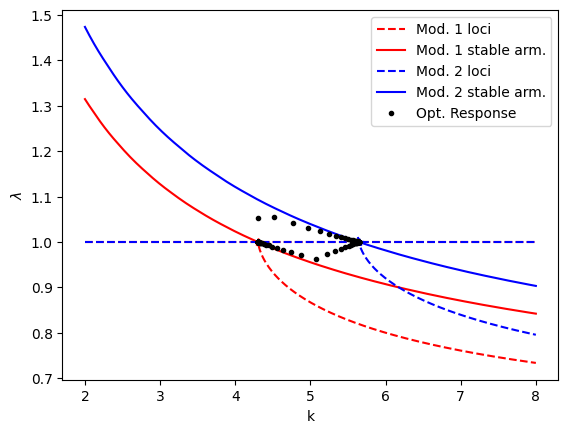

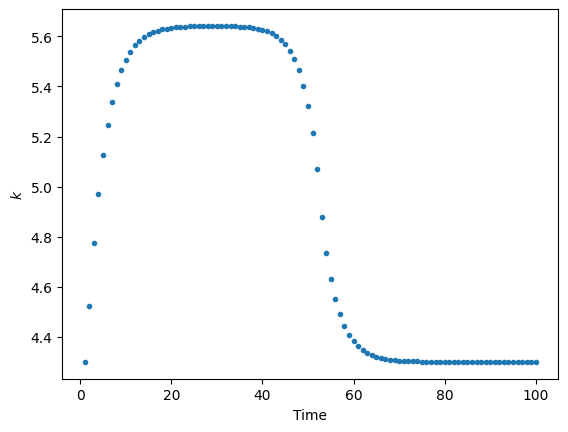

In [12]:
# Draw the two phase diagrams and save them in an object
# to add the plots of dynamics later.

# Copy the initial model, set the higher psi and re-solve
Q_high_psi = deepcopy(Qmodel)
Q_high_psi.psi = psi_high
Q_high_psi.solve()

# Now we draw the phase diagrams of our base model "Qmodel"
# and the new one "Q_high_psi", and store the plot in
# object "ax"
ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_high_psi, k_min = 2, k_max = 8)

# Now we can add the behavior of lambda and k to the diagram.
ax.plot(response.k, response.lambda_1, '.k',label = 'Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

# New figure for capital dynamics
plt.figure()
plt.plot(response.k,'.')
plt.ylabel('$k$')
plt.xlabel('Time')

In [13]:
# Preamble: import the packages we will be using

# Usual packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd

# Install dolo package if not already installed
# Uncomment the following line if you need to install dolo
# !pip install dolo

# Now import dolo
import dolo
import dolo.algos.perfect_foresight as pf

# Import the Qmod python code from external file

# Since the Qmod class is in other folder we need to
# change the path.
import sys
sys.path.append('../')
from Qmod import Qmod

# Q1. Unexpectedly introduces a permanent increase in the corporate tax rate


,R,tau,itc_1,psi
0,1.020408,0.05,0,1.0
1,1.020408,0.05,0,1.0
2,1.020408,0.05,0,1.0
3,1.020408,0.05,0,1.2
4,1.020408,0.05,0,1.2


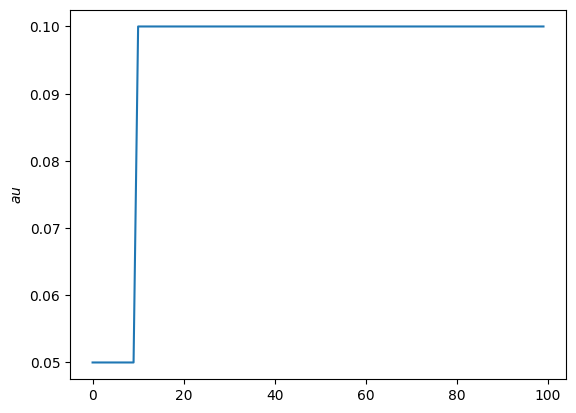

In [14]:
T = 100
k0 = Qmodel.kss
tau_low = 0.05
tau_high = 0.10  

Tau_sequence = np.array([tau]*10+
                        [tau_high]*50+
                        [tau_high]*(T-10-50))
plt.figure()
plt.plot(Tau_sequence)
plt.ylabel('$\tau$')

Exog_Q1 = pd.DataFrame({
    'R': [R] * T,
    'tau': Tau_sequence,
    'itc_1': [zeta] * T,
    'psi': [psi] * T
})
Exog.head()

In [15]:
response_Q1 = pf.deterministic_solve(model=QDolo, shocks=Exog_Q1, T=T, s1=[k0])
response_Q1 = response_Q1[1:]
response.head()

Q_high_tau = deepcopy(Qmodel)
Q_high_tau.tau = tau_high
Q_high_tau.solve()

	> 1 | 0.0772833539677128 | 0
	> 2 | 0.02497723149959541 | 0
	> 3 | 0.004277298769530313 | 0
	> 4 | 0.00016130016326654228 | 0
	> 5 | 2.2549012235195676e-07 | 0
> System was solved after iteration 5. Residual=2.2549012235195676e-07


    Capital diverged at step 2. Holding capital constant.
    Capital diverged at step 3. Holding capital constant.
    Capital diverged at step 4. Holding capital constant.
    Capital diverged at step 9. Holding capital constant.
    Could not find k2 solution at step 6: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 13: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Capital diverged at step 11. Holding capital constant.
    Capital diverged at step 15. Holding capital constant.
    Capital diverged at step 24. Holding capital constant.
    Could not find k2 solution at step 16: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 19: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    

Text(0, 0.5, '$\\lambda$')

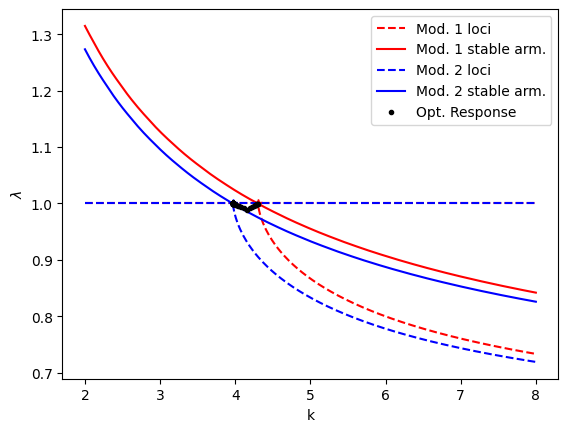

In [16]:
ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_high_tau, k_min = 2, k_max = 8)
ax.plot(response_Q1.k, response_Q1.lambda_1, '.k',label = 'Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

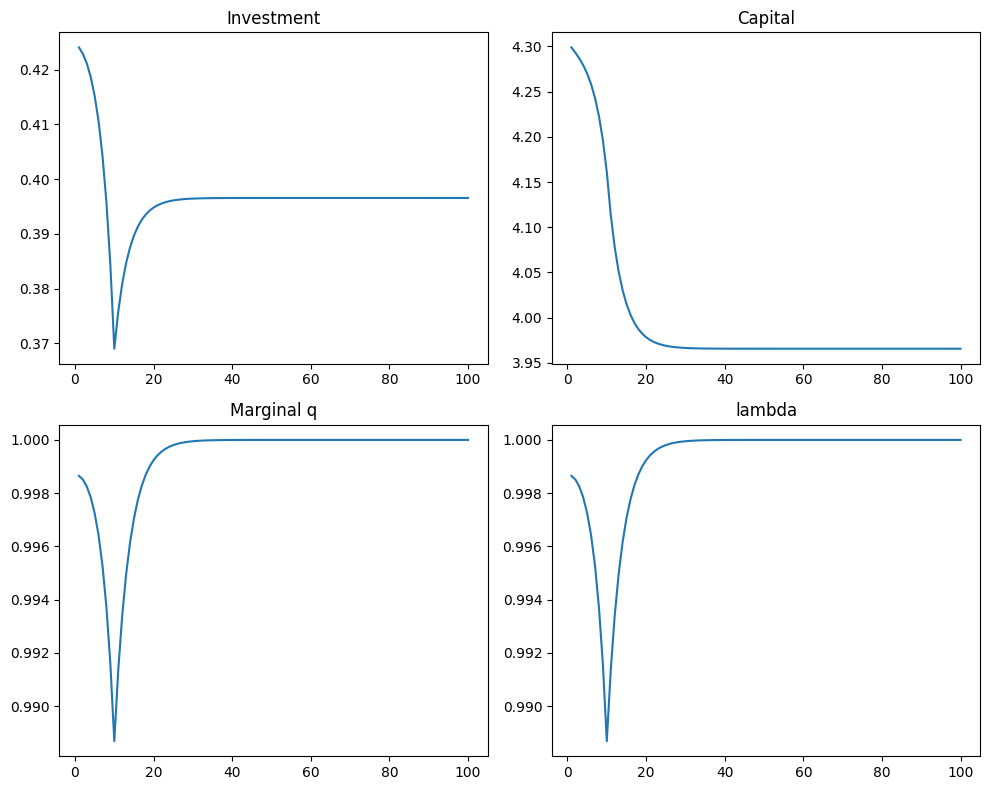

In [17]:

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0,0].plot(response_Q1.i); ax[0,0].set_title('Investment')
ax[0,1].plot(response_Q1.k); ax[0,1].set_title('Capital')
ax[1,0].plot(response_Q1.q_1); ax[1,0].set_title('Marginal q')
ax[1,1].plot(response_Q1.lambda_1); ax[1,1].set_title('lambda') 
plt.tight_layout()

# Q1 Explaination

The higher corporate tax rates do not change the marginal cost of capital. This is because lambda is the after-tax marginal value of extra capital, and the equilibrium will happen when marginal cost equals marginal value. Therefore, in this model, the equilibrium after after-tax marginal value of capital is unchanged in the long run. In the short run, there is a sharp decrease in the share price because the tax increases permanently negatively impact earnings. 

The firm would hold less capital at the new steady state to yield a higher marginal product of capital to match the unchanged marginal cost of capital. Firms respond by scaling back, but adjustment costs prevent instant jumps in capital. 


# Q2. Temporary introduces a permanent increase in the corporate tax rate


	> 1 | 0.10189070758659258 | 0
	> 2 | 0.03554000886381836 | 0
	> 3 | 0.006758403552903136 | 0
	> 4 | 0.0002939627895649499 | 0
	> 5 | 5.057811720554639e-07 | 0
> System was solved after iteration 5. Residual=5.057811720554639e-07
	> 1 | 0.08396573656271766 | 0
	> 2 | 0.028148278187898335 | 0
	> 3 | 0.005370460445207725 | 0
	> 4 | 0.0002718588069070549 | 0
	> 5 | 7.498978792375155e-07 | 0
> System was solved after iteration 5. Residual=7.498978792375155e-07
	> 1 | 0.08396573656271766 | 0
	> 2 | 0.028148278187898335 | 0
	> 3 | 0.005370460445207725 | 0
	> 4 | 0.0002718588069070549 | 0
	> 5 | 7.498978792375155e-07 | 0
> System was solved after iteration 5. Residual=7.498978792375155e-07


    Capital diverged at step 2. Holding capital constant.
    Capital diverged at step 3. Holding capital constant.
    Capital diverged at step 4. Holding capital constant.
    Capital diverged at step 9. Holding capital constant.
    Could not find k2 solution at step 6: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 13: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Capital diverged at step 11. Holding capital constant.
    Capital diverged at step 15. Holding capital constant.
    Capital diverged at step 24. Holding capital constant.
    Could not find k2 solution at step 16: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 19: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    

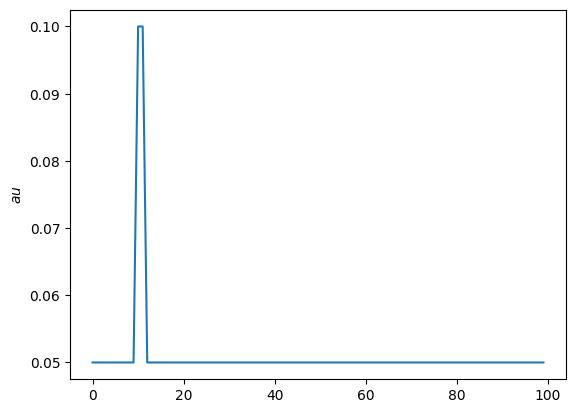

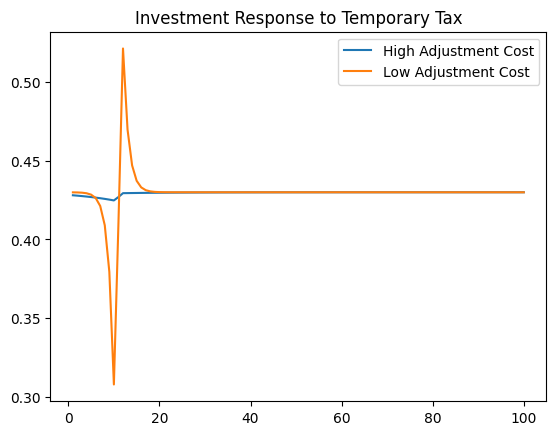

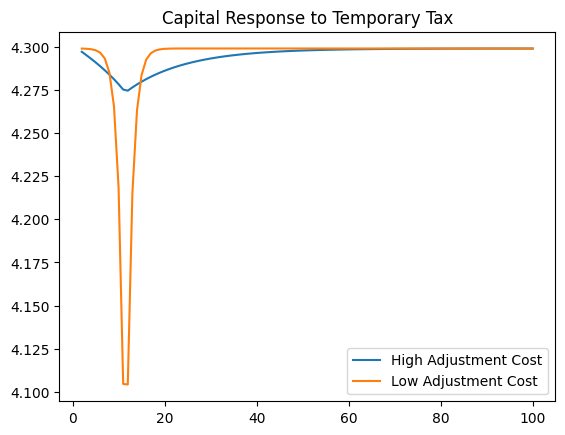

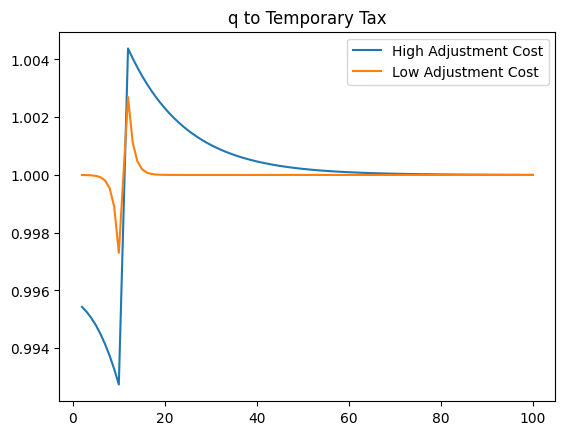

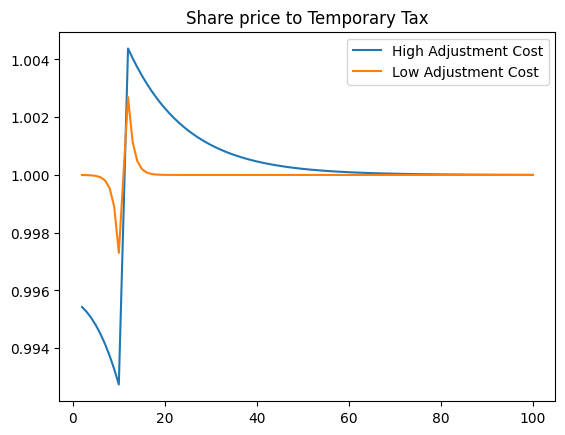

Text(0, 0.5, '$\\lambda$')

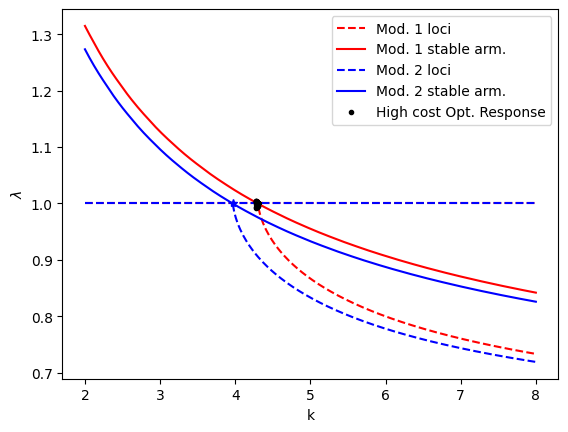

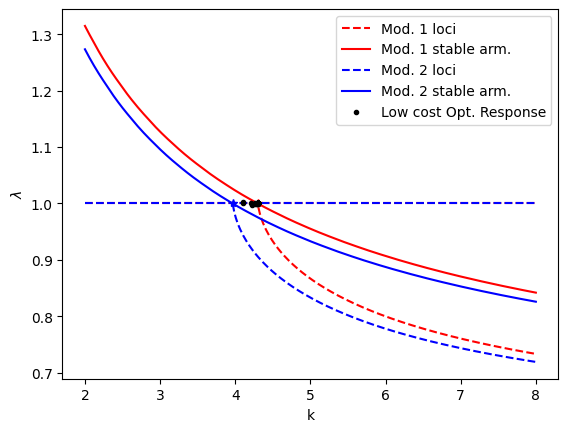

In [18]:
# Parameters
tau_normal = 0.05
tau_temp = 0.10
T = 100

# Shock Path: High for 2 periods, then normal
Tau_seq_temp = np.array([tau_normal]*10+
                        [tau_temp]*2+
                        [tau_normal]*(T-10-2))
plt.figure()
plt.plot(Tau_seq_temp)
plt.ylabel('$\tau$')

Exog_Q2 = pd.DataFrame({
    'R': [R] * T,
    'tau': Tau_seq_temp,
    'itc_1': [zeta] * T,
    'psi': [psi] * T
})

# --- Scenario 1: High Adjustment Costs (omega = 10) ---
omega_high = 10
QDolo.set_calibration(alpha=alpha, delta=delta, omega=omega_high)
# Solve
res_high_adj = pf.deterministic_solve(model=QDolo, shocks=Exog_Q2, T=T, s1=[k0])

# --- Scenario 2: Low Adjustment Costs (omega = 0.1) ---
omega_low = 0.1
QDolo.set_calibration(alpha=alpha, delta=delta, omega=omega_low)
# Solve
res_low_adj = pf.deterministic_solve(model=QDolo, shocks=Exog_Q2, T=T, s1=[k0])

response_Q2 = pf.deterministic_solve(model=QDolo, shocks=Exog_Q2, T=T, s1=[k0])
response_Q2 = response_Q2[1:]
response.head()

Q_temp_tau = deepcopy(Qmodel)
Q_temp_tau.tau = tau_temp
Q_temp_tau.solve()

plt.figure()
plt.plot(res_high_adj.i[1:], label='High Adjustment Cost')
plt.plot(res_low_adj.i[1:], label='Low Adjustment Cost')
plt.title('Investment Response to Temporary Tax')
plt.legend()
plt.show()

plt.figure()
plt.plot(res_high_adj.k[2:], label='High Adjustment Cost')
plt.plot(res_low_adj.k[2:], label='Low Adjustment Cost')
plt.title('Capital Response to Temporary Tax')
plt.legend()
plt.show()

plt.figure()
plt.plot(res_high_adj.q_1[2:], label='High Adjustment Cost')
plt.plot(res_low_adj.q_1[2:], label='Low Adjustment Cost')
plt.title('q to Temporary Tax')
plt.legend()
plt.show()

plt.figure()
plt.plot(res_high_adj.lambda_1[2:], label='High Adjustment Cost')
plt.plot(res_low_adj.lambda_1[2:], label='Low Adjustment Cost')
plt.title('Share price to Temporary Tax')
plt.legend()
plt.show()

ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_temp_tau, k_min = 2, k_max = 8)
ax.plot(res_high_adj.k, res_high_adj.lambda_1, '.k',label = 'High cost Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_temp_tau, k_min = 2, k_max = 8)
ax.plot(res_low_adj.k, res_low_adj.lambda_1, '.k',label = 'Low cost Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

In [19]:
response_Q2 = pf.deterministic_solve(model=QDolo, shocks=Exog_Q2, T=T, s1=[k0])
response_Q2 = response_Q2[1:]
response.head()

Q_temp_tau = deepcopy(Qmodel)
Q_temp_tau.tau = tau_temp
Q_temp_tau.solve()

	> 1 | 0.08396573656271766 | 0
	> 2 | 0.028148278187898335 | 0
	> 3 | 0.005370460445207725 | 0
	> 4 | 0.0002718588069070549 | 0
	> 5 | 7.498978792375155e-07 | 0
> System was solved after iteration 5. Residual=7.498978792375155e-07


    Capital diverged at step 2. Holding capital constant.
    Capital diverged at step 3. Holding capital constant.
    Capital diverged at step 4. Holding capital constant.
    Capital diverged at step 9. Holding capital constant.
    Could not find k2 solution at step 6: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 13: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Capital diverged at step 11. Holding capital constant.
    Capital diverged at step 15. Holding capital constant.
    Capital diverged at step 24. Holding capital constant.
    Could not find k2 solution at step 16: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 19: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    

Text(0, 0.5, '$\\lambda$')

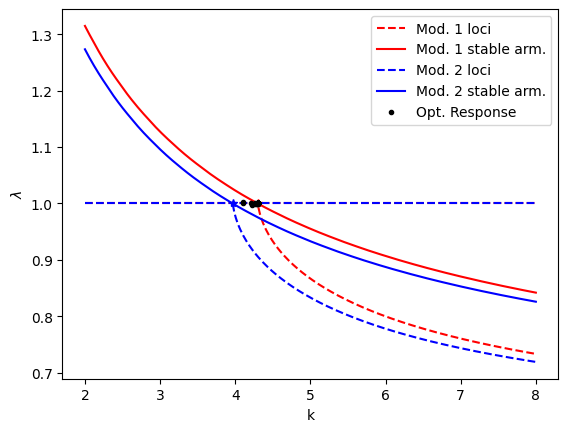

In [20]:
ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_temp_tau, k_min = 2, k_max = 8)
ax.plot(response_Q2.k, response_Q2.lambda_1, '.k',label = 'Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

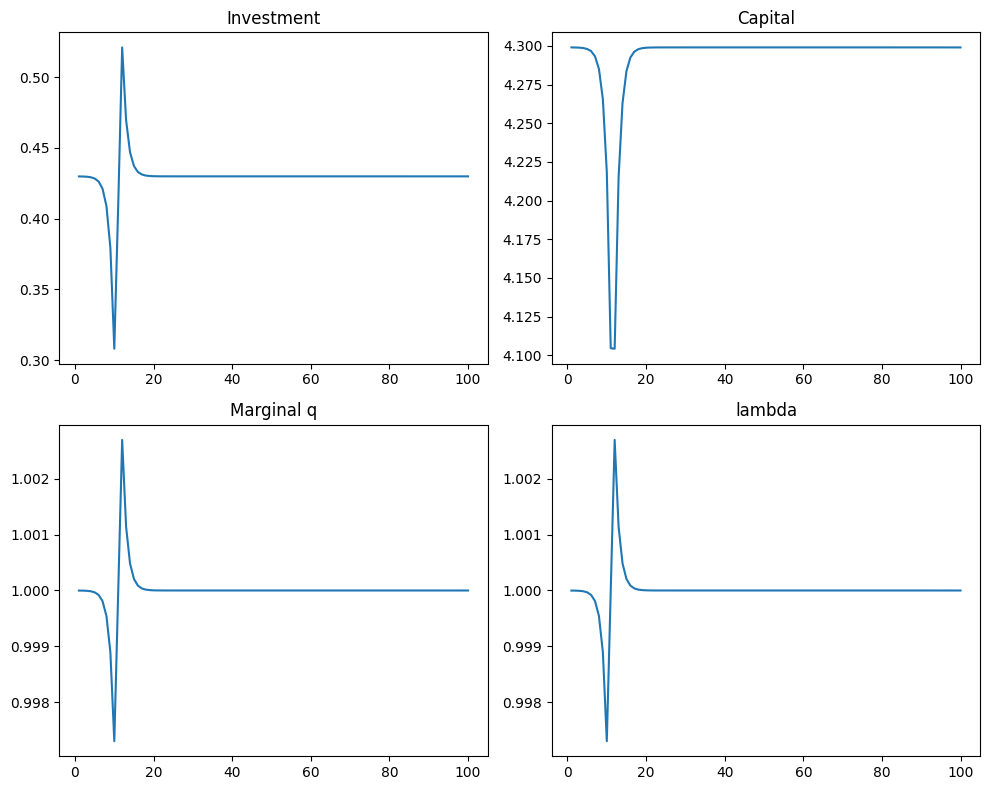

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0,0].plot(response_Q2.i); ax[0,0].set_title('Investment')
ax[0,1].plot(response_Q2.k); ax[0,1].set_title('Capital')
ax[1,0].plot(response_Q2.q_1); ax[1,0].set_title('Marginal q')
ax[1,1].plot(response_Q2.lambda_1); ax[1,1].set_title('lambda') 
plt.tight_layout()

# Q2 Explaination

When there is a temporary corporate tax increase, the high adjustment cost might not be able to change their capital stock quickly as a low adjustment cost firm. Since the tax is temporary, the fluctuation in K of high cost firms is smaller than low cost firms because changing in capital is cheap for them.

 Regarding the value of Q and Lambda, they also drop but not as much as permanent cases in absolute terms. For the low cost firms, since they can adjust capital stock easily, the marginal value of capital does not shift as much as high stock firms. On the other hand, the high cost firms cannot adjust capital quickly so the drop of marginal value is big because they are holding too much capital stock. 



# Q3. Announce in Three Years, Permanent decrease in the corporate tax rate


	> 1 | 0.08520376386846273 | 0
	> 2 | 0.02867495187988145 | 0
	> 3 | 0.005454486273860248 | 0
	> 4 | 0.00026700640924870456 | 0
	> 5 | 6.588708929555764e-07 | 0
> System was solved after iteration 5. Residual=6.588708929555764e-07


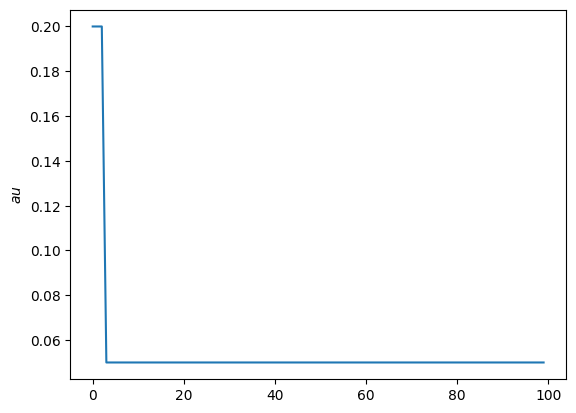

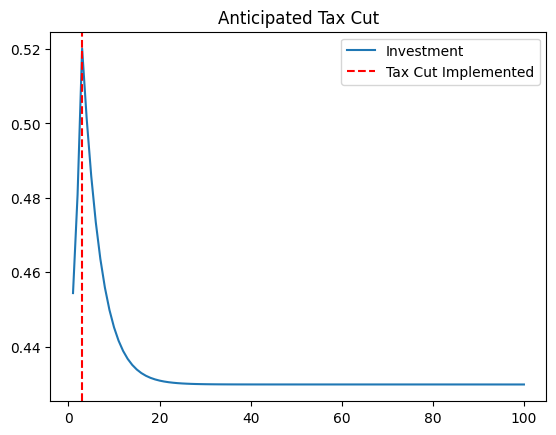

In [22]:
# Parameters
tau_current = 0.20
tau_future = 0.05
T = 100

# Start at high tax steady state
Qmodel_start = Qmod(beta, tau_current, alpha, omega, zeta, delta, psi)
Qmodel_start.solve()
k_high_tax = Qmodel_start.kss

# Shock Path: 3 years of high tax, then permanent low tax
# Note: Dolo sees row 0 as time t, row 1 as t+1, etc.
# t=0, t=1, t=2 are high (3 years). t=3 becomes low.
Tau_seq_antic = np.array([tau_current]*3 + [tau_future]*(T-3))
plt.figure()
plt.plot(Tau_seq_antic)
plt.ylabel('$\tau$')

Exog_Q3 = pd.DataFrame({
    'R': [R] * T,
    'tau': Tau_seq_antic,
    'itc_1': [zeta] * T,
    'psi': [psi] * T
})

# Solve for High vs Low Omega again (resetting QDolo params as needed)
# Example for current omega setting:
QDolo.set_calibration(alpha=alpha, delta=delta, omega=1.0) # Reset to standard
res_antic = pf.deterministic_solve(model=QDolo, shocks=Exog_Q3, T=T, s1=[k_high_tax])

plt.figure()
plt.plot(res_antic.i[1:], label='Investment')
plt.axvline(x=3, color='r', linestyle='--', label='Tax Cut Implemented')
plt.title('Anticipated Tax Cut')
plt.legend()
plt.show()

In [23]:
response_Q3 = pf.deterministic_solve(model=QDolo, shocks=Exog_Q3, T=T, s1=[k0])
response_Q3 = response_Q3[1:]
response.head()

Q_antic_tau = deepcopy(Qmodel_start)
Q_antic_tau.tau = tau_future
Q_antic_tau.solve()

	> 1 | 0.08584546283991046 | 0
	> 2 | 0.02893972973275205 | 0
	> 3 | 0.0054883321836982635 | 0
	> 4 | 0.00026281379443893194 | 0
	> 5 | 6.066569393503585e-07 | 0
> System was solved after iteration 5. Residual=6.066569393503585e-07


    Capital diverged at step 2. Holding capital constant.
    Capital diverged at step 3. Holding capital constant.
    Capital diverged at step 4. Holding capital constant.
    Capital diverged at step 9. Holding capital constant.
    Could not find k2 solution at step 6: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 13: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Capital diverged at step 11. Holding capital constant.
    Capital diverged at step 15. Holding capital constant.
    Capital diverged at step 24. Holding capital constant.
    Could not find k2 solution at step 16: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    Could not find k2 solution at step 19: Could not find capital value satisfying Euler equation. Holding capital constant for remaining periods.
    

Text(0, 0.5, '$\\lambda$')

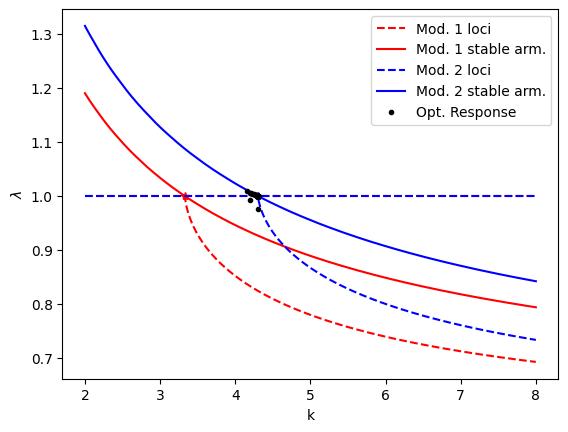

In [24]:
ax = phase_diagrams(mod1 = Qmodel_start, mod2 = Q_antic_tau, k_min = 2, k_max = 8)
ax.plot(response_Q3.k, response_Q3.lambda_1, '.k',label = 'Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

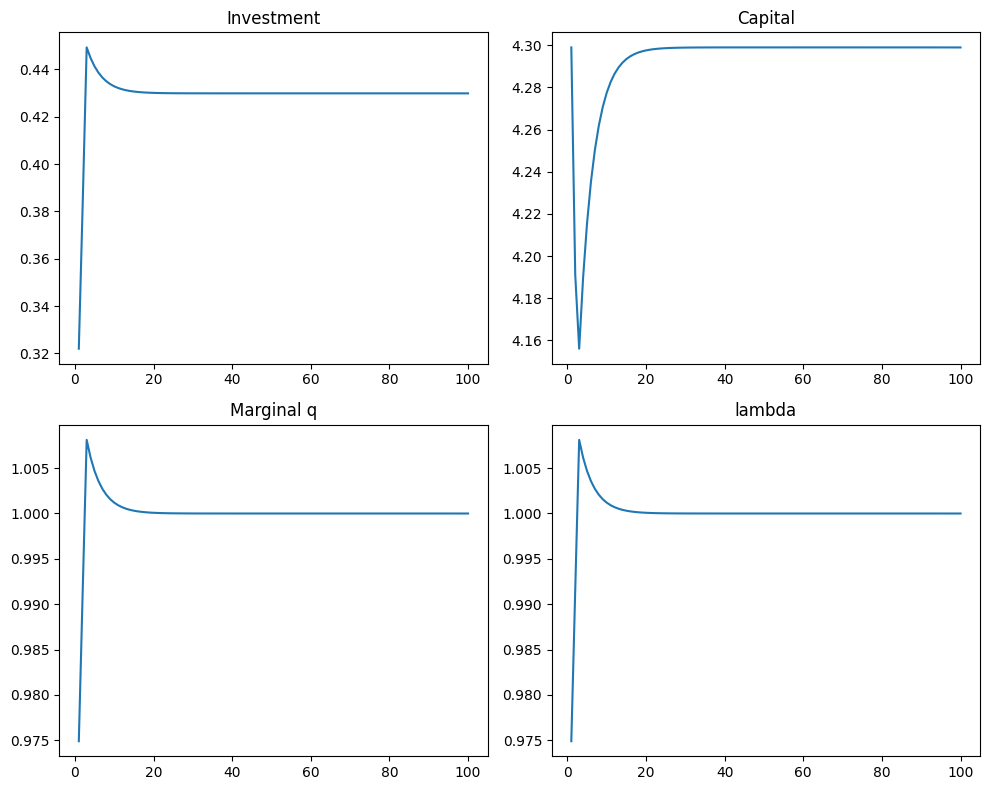

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0,0].plot(response_Q3.i); ax[0,0].set_title('Investment')
ax[0,1].plot(response_Q3.k); ax[0,1].set_title('Capital')
ax[1,0].plot(response_Q3.q_1); ax[1,0].set_title('Marginal q')
ax[1,1].plot(response_Q3.lambda_1); ax[1,1].set_title('lambda') 
plt.tight_layout()

	> 1 | 0.09630610262371297 | 0
	> 2 | 0.033293911984594526 | 0
	> 3 | 0.006353903406867478 | 0
	> 4 | 0.00028655968090329775 | 0
	> 5 | 5.426855127499408e-07 | 0
> System was solved after iteration 5. Residual=5.426855127499408e-07
	> 1 | 0.08520376386846273 | 0
	> 2 | 0.02867495187988145 | 0
	> 3 | 0.005454486273860248 | 0
	> 4 | 0.00026700640924870456 | 0
	> 5 | 6.588708929555764e-07 | 0
> System was solved after iteration 5. Residual=6.588708929555764e-07


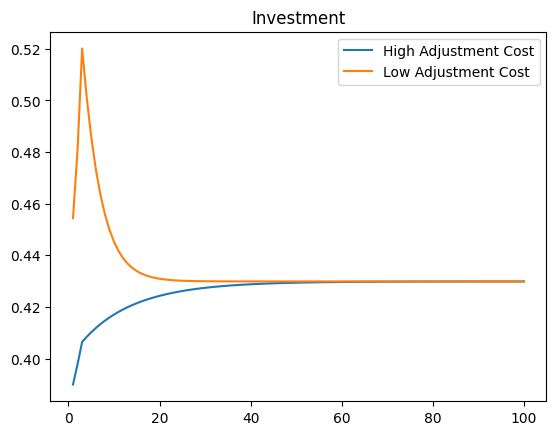

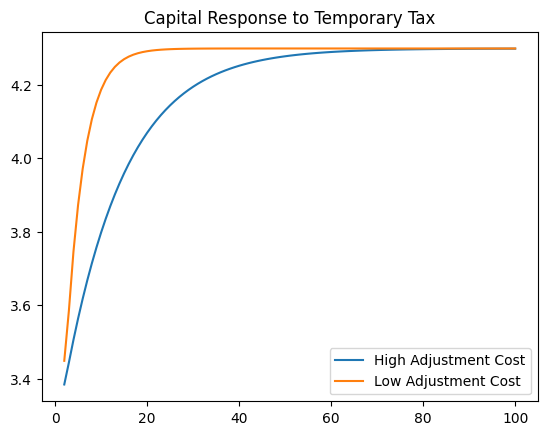

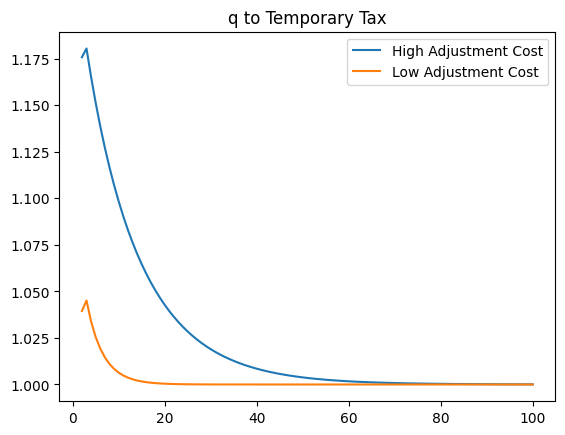

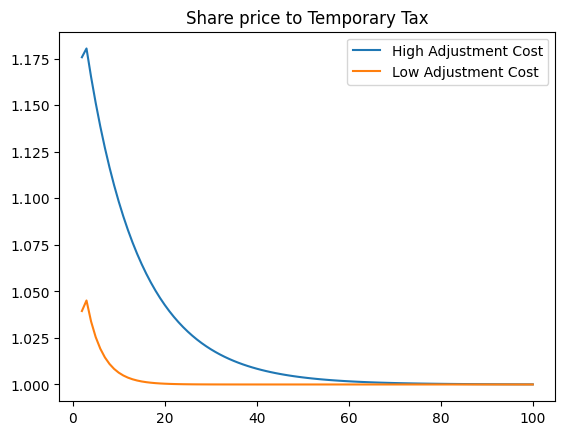

Text(0, 0.5, '$\\lambda$')

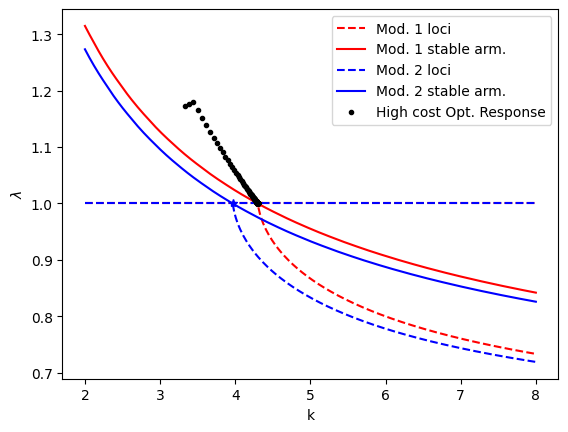

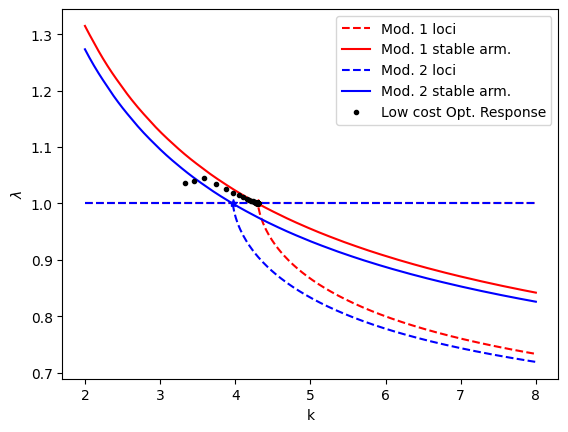

In [26]:
omega_high = 10
QDolo.set_calibration(alpha=alpha, delta=delta, omega=omega_high)
# Solve
res_high_antic = pf.deterministic_solve(model=QDolo, shocks=Exog_Q3, T=T, s1=[k_high_tax])

# --- Scenario 2: Low Adjustment Costs (omega = 0.1) ---
omega_low = 1
QDolo.set_calibration(alpha=alpha, delta=delta, omega=omega_low)
# Solve
res_low_antic = pf.deterministic_solve(model=QDolo, shocks=Exog_Q3, T=T, s1=[k_high_tax])

plt.figure()
plt.plot(res_high_antic.i[1:], label='High Adjustment Cost')
plt.plot(res_low_antic.i[1:], label='Low Adjustment Cost')
plt.title('Investment')
plt.legend()
plt.show()


plt.figure()
plt.plot(res_high_antic.k[2:], label='High Adjustment Cost')
plt.plot(res_low_antic.k[2:], label='Low Adjustment Cost')
plt.title('Capital Response to Temporary Tax')
plt.legend()
plt.show()

plt.figure()
plt.plot(res_high_antic.q_1[2:], label='High Adjustment Cost')
plt.plot(res_low_antic.q_1[2:], label='Low Adjustment Cost')
plt.title('q to Temporary Tax')
plt.legend()
plt.show()

plt.figure()
plt.plot(res_high_antic.lambda_1[2:], label='High Adjustment Cost')
plt.plot(res_low_antic.lambda_1[2:], label='Low Adjustment Cost')
plt.title('Share price to Temporary Tax')
plt.legend()
plt.show()

ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_temp_tau, k_min = 2, k_max = 8)
ax.plot(res_high_antic.k, res_high_antic.lambda_1, '.k',label = 'High cost Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

ax = phase_diagrams(mod1 = Qmodel, mod2 = Q_temp_tau, k_min = 2, k_max = 8)
ax.plot(res_low_antic.k, res_low_antic.lambda_1, '.k',label = 'Low cost Opt. Response')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\\lambda$')

# Q3 Explaination

In general, firms would like to spread and smooth out the adjustment cost by adjusting their capital partly before the shock happens when they can anticipate about the future. In this case, the high cost firm tends to start investing early with the anticipated tax decrease while the low cost firm would wait to build later. This is because low cost firms can build capital quickly as it’s cheap to build. 

Anticipation amplifies the role of cost of adjustment. High cost of adjustment necessitates foresight and early action to overcome the cost. It can be seen that the dynamic graph for high cost is more smooth. 



# Q4 Explaination

When a bill is introduced but not passed yet, it would be similar to the anticipated tax change while making it “retroactive”, the firm reaction would be similar to what happens in Question 1. By making the bill retroactive, any distortion between the introduction and law pass can be mitigated while waiting for the debate. If the debate keeps going longer, the distortion becomes larger. Therefore, lawmakers prefer to make it ‘retroactive.’ 

Regarding the ITC, it would change the marginal cost of capital so firms would respond much quicker. Without retroactive ITC, the firm might want to wait for sale or buy in bulk if ITC is lower. Thus, the economy might fall into recession or boom stronger than the corporate tax. It seems to me that the retroactive ITC is more important to prevent these volatile shifts in the economy. Overall, the retroactive for corporate can be helpful but it is less critical than ITC when there is no retroactive. 




# Q5 Explaination

It seems the accounting trick to shift reports between years can weaken the retroactive law makers. By shifting profit between years, they can minimize tax cost between calendar years. In this way, the accounting trick can help the firms to not adjust capital as much because they can just report the change in profit in paper rather than in capital to avoid the tax. 

On the other hand, regarding the ITC, the trick might not work when the firm purchases new equipment. It might be difficult to “shift” the purchase date of a machine. Hence, with the ITC, the firm needs to take real investment to get the tax benefit rather than using tricks for corporate tax. 


